In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import load_boston
from matplotlib import cm  # color map
import math
import matplotlib.pyplot as plt #matplotlib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns 
from sklearn import metrics
from scipy.linalg import eigh

In [2]:
boston_dataset = load_boston()
csvfile = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
y = boston_dataset.target
csvfile

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [3]:
# fitting dataset into standardscaler
snd = StandardScaler().fit_transform(csvfile)

In [4]:
# covarience matrix cov = X.T*X
cov = np.matmul(snd.T,snd)
# finding top two eigen values and corresponding eigen vectors using scipy.linalg by importing eigh
values , vectors = eigh(cov,eigvals=(11,12))
# for matrix multiplication change shape of vectors from 13*2 to 2*13
vectors = vectors.T

In [5]:

# matrix multiplication of vectors(2*13) to snd transpose size (13*506)
project= np.matmul(vectors,snd.T)
# appending target to projected new 
new = np.vstack((project,y)).T
# creating new dataframe
df = pd.DataFrame(data=new,columns=("1 principal","2 principal","target"))
print(df)

     1 principal  2 principal  target
0      -0.773113    -2.098297    24.0
1      -0.591985    -1.457252    21.6
2      -0.599639    -2.074598    34.7
3       0.006871    -2.611504    33.4
4      -0.097712    -2.458185    36.2
..           ...          ...     ...
501    -0.724285    -0.314968    22.4
502    -0.759308    -0.110513    20.6
503    -1.155246    -0.312360    23.9
504    -1.041362    -0.270519    22.0
505    -0.761978    -0.125803    11.9

[506 rows x 3 columns]


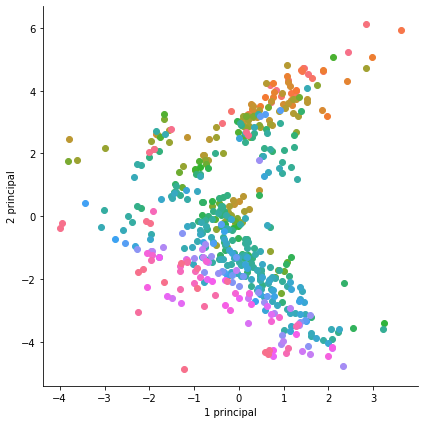

In [6]:
# seaborn plot of new projected dataframe
sns.FacetGrid(df,hue = "target",height=6).map(plt.scatter,'1 principal','2 principal')
plt.show()

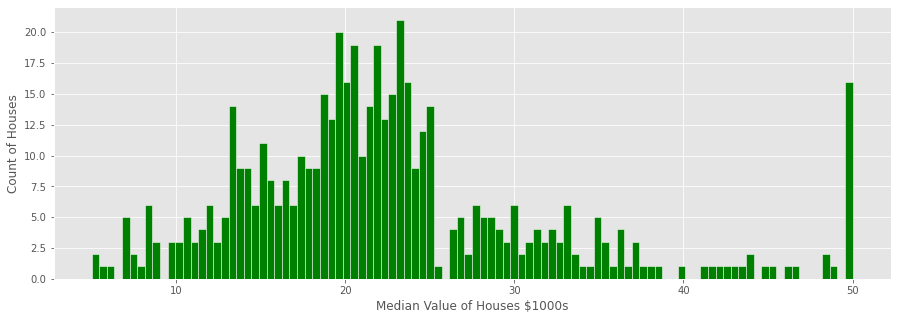

In [7]:
# prepare IPython to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt  
plt.style.use('ggplot')

# edit the code below to make the graph look good
plt.figure(figsize=(15,5))
plot = plt.hist(y, bins=100, color='g', edgecolor = 'white')
plt.xlabel('Median Value of Houses $1000s')
plt.ylabel('Count of Houses')
plt.show()


In [ ]:
# Scatter plot of housing prices and crime
plt.figure(figsize=(15,5))
plot = plt.scatter(boston_dataset.data[:,0],y)
plt.xlim(-1,100)
plt.ylabel('Median Value of Home')
plt.xlabel('Per Capita Crime Rate')
plt.title('Scatter Plot of Median Value of home v/s per capita crime rate')
plt.show()



In [ ]:
#We now try to regress the Number of bedrooms ('B') to obtain the Median Home Price (MEDV).
#We use a scatter plot and on top of it place the regression line to show the relation


In [ ]:
# Function to compute the Root Mean Squared Error for a list of numbers
def compute_rmse(predictions, yvalues):
    error_sq = (predictions - yvalues)**2
    error_sq = error_sq.sum()
    rmse = np.sqrt(error_sq/float(len(predictions)))
    return rmse

In [10]:
boston_dataset = load_boston()
csvfile = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
y1 = boston_dataset.target
X = csvfile
Y = pd.DataFrame(y1)


In [22]:
# csvfile = pd.read_csv(r"C:\Users\sonuk\OneDrive\Documents\HousingData.csv")
# X = csvfile.drop('MEDV',axis = 1)
# Y = csvfile['MEDV']
# X.head()


In [ ]:
# # fitting dataset into standardscaler
# snd = StandardScaler().fit_transform(X)
# X1 = pd.DataFrame(snd)

In [11]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 50)
data = pd.concat([X_train, y_train], axis = 1)
data_test = pd.concat([X_test, y_test], axis=1)
data.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace=True)
print(" dataset of training set \n ",data)
print("dataset of test data \n ",data_test)

 dataset of training set 
           CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     7.52601   0.0  18.10   0.0  0.713  6.417   98.3  2.1850  24.0  666.0   
1    18.49820   0.0  18.10   0.0  0.668  4.138  100.0  1.1370  24.0  666.0   
2     0.36894  22.0   5.86   0.0  0.431  8.259    8.4  8.9067   7.0  330.0   
3     9.59571   0.0  18.10   0.0  0.693  6.404  100.0  1.6390  24.0  666.0   
4    25.94060   0.0  18.10   0.0  0.679  5.304   89.1  1.6475  24.0  666.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
399   0.04297  52.5   5.32   0.0  0.405  6.565   22.9  7.3172   6.0  293.0   
400   0.26363   0.0   8.56   0.0  0.520  6.229   91.2  2.5451   5.0  384.0   
401   8.71675   0.0  18.10   0.0  0.693  6.471   98.8  1.7257  24.0  666.0   
402   5.82401   0.0  18.10   0.0  0.532  6.242   64.7  3.4242  24.0  666.0   
403   0.07022   0.0   4.05   0.0  0.510  6.020   47.2  3.5549   5.0  296.0   

     PTRATIO       B  LSTAT     0  

In [25]:
def distance(x,X):
    dis = np.sqrt(np.sum((x-X)**2))
    return dis


In [31]:
def KNN(X,Y,x,k=5):
    m = X.shape[0]
    val = []
    for i in range(m):
        x_new = X[i]
        dist = distance(x,x_new)
        val.append((dist,Y[i]))
    val = sorted(val,key= lambda x:x[0])[:k]
    val = np.asarray(val)
    new = np.unique(val[:,1],return_counts=True)
    index = new[1].argmax()
    output = new[0][index]
    return output

In [32]:
KNN(X_train,y_train,X_test[:2],k=5)

KeyError: 0

In [12]:
# def kNN(X, y, x_query, k=5):
    
#     m = X.shape[0]
#     distances = []
#     for i in range(m):
#         dis = distance(x_query, X[i])
#         distances.append((dis, y[i]))
        
#     distances = sorted(distances)
#     distances = distances[:k]
#     distances = np.array(distances)
#     labels = distances[:,1]
#     uniq_label, counts = np.unique(labels, return_counts=True)    
#     pred = uniq_label[counts.argmax()]
    
#     return int(pred)

In [ ]:
kNN(X_train, y_train, X_test[4], k=5)

In [13]:
predictions = []
for i in range(100):
    temp = kNN(X_train, y_train, X_test[i], k=9)
    predictions.append(temp)

KeyError: 0

In [14]:
predictions = np.array(predictions)

In [15]:
(y_test[:100] == predictions).sum()/len(predictions)

ValueError: Lengths must match to compare

In [12]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

def euclidean_distance(x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))


def fit( X, y):
    X_train = X
    y_train = y
    
def predict(k,X):
    y_pred = [_predict(k,x) for x in X]
    return np.array(y_pred)

def _predict(k, x):
        # Compute euclidean distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in X_train]
        
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[:k]
        
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [y_train[i] for i in k_idx] 
        
        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

In [13]:
k = 3

fit(X_train, y_train)
predictions = predict(k,X_test)
print("custom KNN classification accuracy", accuracy(y_test, predictions))

TypeError: unsupported operand type(s) for -: 'str' and 'str'